<a href="https://colab.research.google.com/github/Vishwa1030/Sales-Report/blob/main/Sale_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Business Insights**

In [ ]:
#load the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
# Load the dataset
df = pd.read_csv('/content/Amazon Sale Report.csv')
df

<ipython-input-2-dcdd69b36048>:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Amazon Sale Report.csv')


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35412,35411,405-7903439-6383537,04-09-2022,Shipped,Amazon,Amazon.in,Expedited,Trousers,XXL,Shipped,...,INR,391.00,KARNAL,HARYANA,132001.0,IN,False,NaN,NaN,NaN
35413,35412,403-0759242-2605967,04-09-2022,Shipped,Amazon,Amazon.in,Expedited,Trousers,XL,Shipped,...,INR,540.00,GURUGRAM,HARYANA,122001.0,IN,False,NaN,NaN,NaN
35414,35413,405-8246015-4981945,04-09-2022,Shipped,Amazon,Amazon.in,Expedited,Shirt,3XL,Shipped,...,INR,484.00,THANE,MAHARASHTRA,400610.0,IN,False,NaN,NaN,NaN
35415,35414,406-4876379-7569952,04-09-2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Trousers,L,Shipped,...,INR,279.00,BABRA,Gujarat,365421.0,IN,False,Easy Ship,NaN,NaN


In [ ]:
# Data Overview
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,fulfilled-by,New,PendingS,year,month,customer_id,Total_Spent,Order_Count,Region,Cluster
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,Easy Ship,NaN,NaN,2022.0,4.0,default_customer,20760193.08,35417,Region_B,0
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,Easy Ship,NaN,NaN,2022.0,4.0,default_customer,20760193.08,35417,Region_B,0
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,NaN,NaN,NaN,2022.0,4.0,default_customer,20760193.08,35417,Region_B,0
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,Easy Ship,NaN,NaN,2022.0,4.0,default_customer,20760193.08,35417,Region_B,0
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,NaN,NaN,NaN,2022.0,4.0,default_customer,20760193.08,35417,Region_B,0


In [ ]:
df.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.0,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN
128975,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,False,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35417 entries, 0 to 35416
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               35417 non-null  int64  
 1   Order ID            35417 non-null  object 
 2   Date                35416 non-null  object 
 3   Status              35416 non-null  object 
 4   Fulfilment          35416 non-null  object 
 5   Sales Channel       35416 non-null  object 
 6   ship-service-level  35416 non-null  object 
 7   Category            35416 non-null  object 
 8   Size                35416 non-null  object 
 9   Courier Status      35416 non-null  object 
 10  Qty                 35416 non-null  float64
 11  currency            33261 non-null  object 
 12  Amount              33261 non-null  float64
 13  ship-city           35403 non-null  object 
 14  ship-state          35403 non-null  object 
 15  ship-postal-code    35403 non-null  float64
 16  ship

In [ ]:
# Data Cleaning (Example: Handling missing values)
df.fillna({'Amount': 0, 'Qty': 0}, inplace=True)

In [ ]:
# Identify missing values
missing_values = df.isnull()

# Count missing values per column
missing_counts = df.isnull().sum()

print(missing_values)
print(missing_counts)

       index  Order ID   Date  Status  Fulfilment  Sales Channel  \
0      False     False  False   False       False          False   
1      False     False  False   False       False          False   
2      False     False  False   False       False          False   
3      False     False  False   False       False          False   
4      False     False  False   False       False          False   
...      ...       ...    ...     ...         ...            ...   
35412  False     False  False   False       False          False   
35413  False     False  False   False       False          False   
35414  False     False  False   False       False          False   
35415  False     False  False   False       False          False   
35416  False     False   True    True        True           True   

       ship-service-level  Category   Size  Courier Status  ...  fulfilled-by  \
0                   False     False  False           False  ...         False   
1                   F

In [ ]:
# Use the display() function to show the DataFrame
display(missing_values)
display(missing_counts)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,fulfilled-by,New,PendingS,year,month,customer_id,Total_Spent,Order_Count,Region,Cluster
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35412,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
35413,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
35414,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
35415,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False


,0
index,0
Order ID,0
Date,1
Status,1
Fulfilment,1
Sales Channel,1
ship-service-level,1
Category,1
Size,1
Courier Status,1


 **Sales Overview**

In [ ]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Group by date and sum the 'Amount' to get daily sales
daily_sales = df.groupby('Date')['Amount'].sum().reset_index()
display(daily_sales)

,Date,Amount
0,04-09-2022,441738.60
1,04-10-2022,1075234.03
2,04-11-2022,949559.27
3,04-12-2022,887194.03
4,04-13-22,977017.30
5,04-14-22,1113487.56
6,04-15-22,1024542.13
7,04-16-22,1010056.23
8,04-17-22,940843.90
9,04-18-22,885403.46


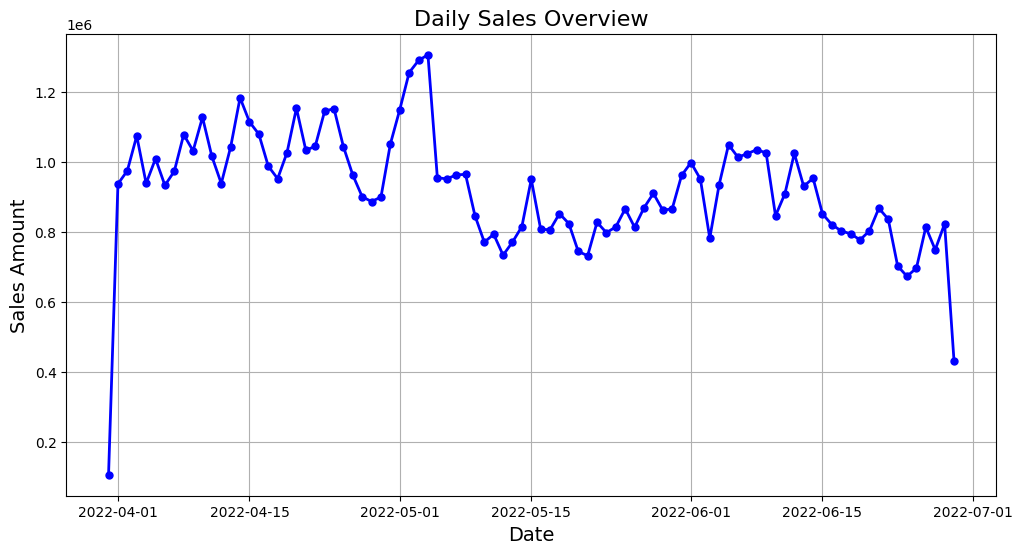

In [ ]:
# Plot the sales trend over time
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Amount'], marker='o', color='b', linestyle='-', linewidth=2, markersize=5)
plt.title('Daily Sales Overview', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales Amount', fontsize=14)
plt.grid(True)
plt.show()

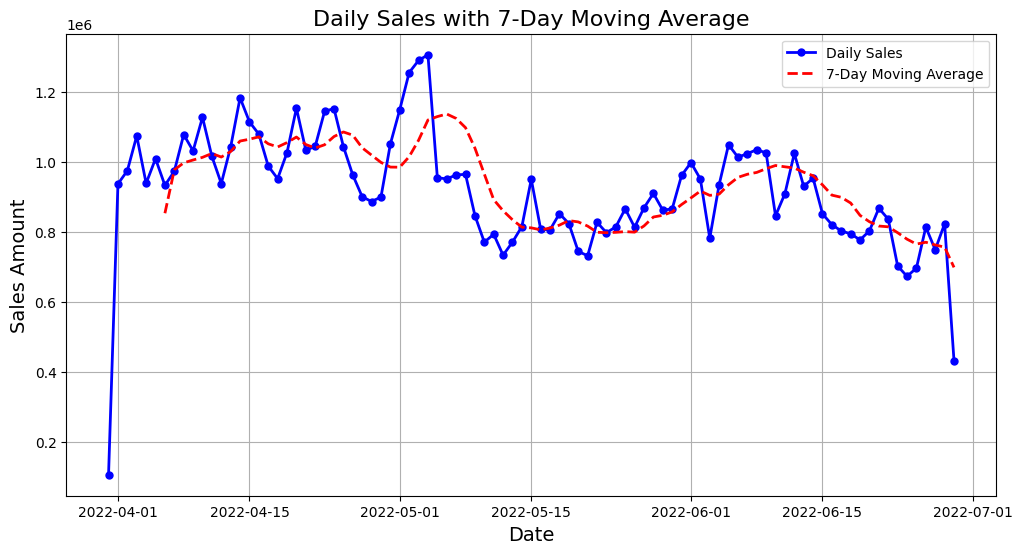

In [ ]:
# Moving average to smooth out the trend
daily_sales['Moving_Avg'] = daily_sales['Amount'].rolling(window=7).mean()  # 7-day moving average

# Plot the original sales and the moving average
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Amount'], marker='o', color='b', linestyle='-', linewidth=2, markersize=5, label='Daily Sales')
plt.plot(daily_sales['Date'], daily_sales['Moving_Avg'], color='r', linestyle='--', linewidth=2, label='7-Day Moving Average')
plt.title('Daily Sales with 7-Day Moving Average', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales Amount', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Aggregate sales data by month
monthly_sales = df.resample('M', on='Date')['Amount'].sum().reset_index()

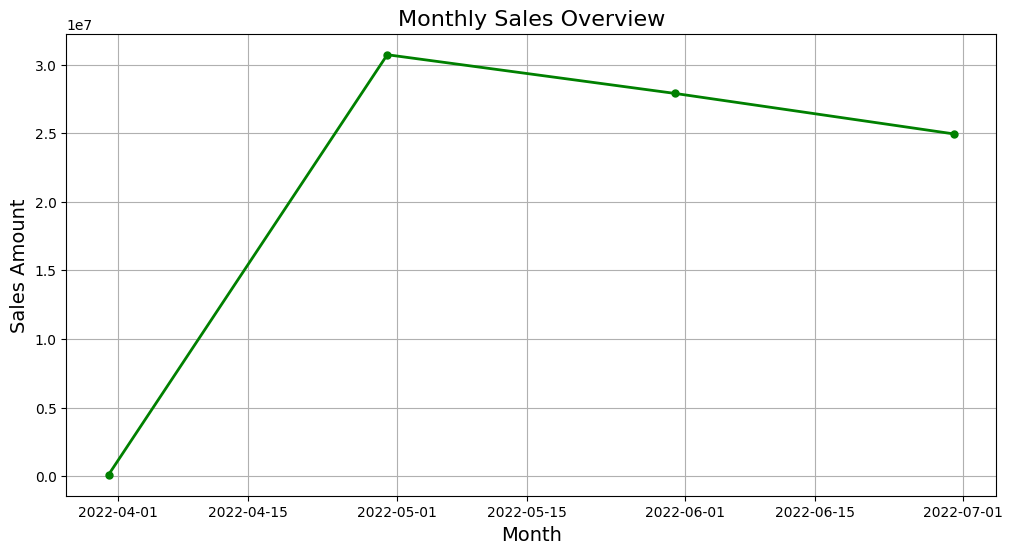

In [ ]:
# Plot the monthly sales trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Date'], monthly_sales['Amount'], marker='o', color='g', linestyle='-', linewidth=2, markersize=5)
plt.title('Monthly Sales Overview', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Sales Amount', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
# Aggregate sales data by week
weekly_sales = df.resample('W', on='Date')['Amount'].sum().reset_index()

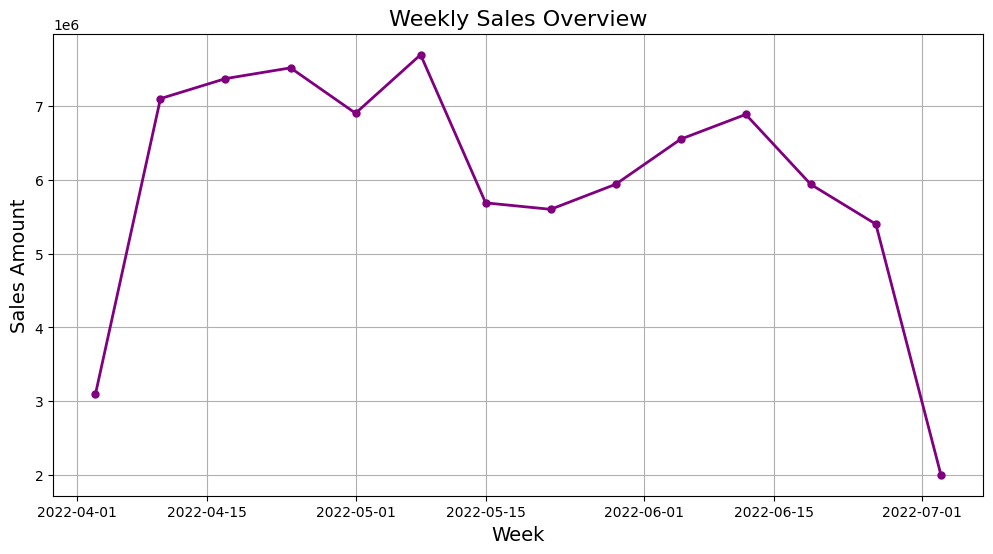

In [ ]:
# Plot the weekly sales trend
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales['Date'], weekly_sales['Amount'], marker='o', color='purple', linestyle='-', linewidth=2, markersize=5)
plt.title('Weekly Sales Overview', fontsize=16)
plt.xlabel('Week', fontsize=14)
plt.ylabel('Sales Amount', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
# Accesses the 'Date' column of the DataFrame
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month

In [ ]:
total_sales = df['Amount'].sum()
print(f'Total Sales Amount: {total_sales}')

Total Sales Amount: 83654763.78999999


In [ ]:
sales_over_time = df.groupby(['year', 'month'])['Amount'].sum().reset_index()
display(sales_over_time)

,year,month,Amount
0,2022.0,4.0,20760193.08


 **Product Analysis**

In [ ]:
# Count the number of orders per category
category_distribution_df = df['Category'].value_counts().reset_index()

In [ ]:
# Rename the columns for clarity
category_distribution_df.columns = ['Category', 'Number of Orders']
# Display the top 5 product categories
display(category_distribution_df)

,Category,Number of Orders
0,T-shirt,50292
1,Shirt,49877
2,Blazzer,15500
3,Trousers,10616
4,Perfume,1157
5,Wallet,926
6,Socks,440
7,Shoes,165
8,Watch,3


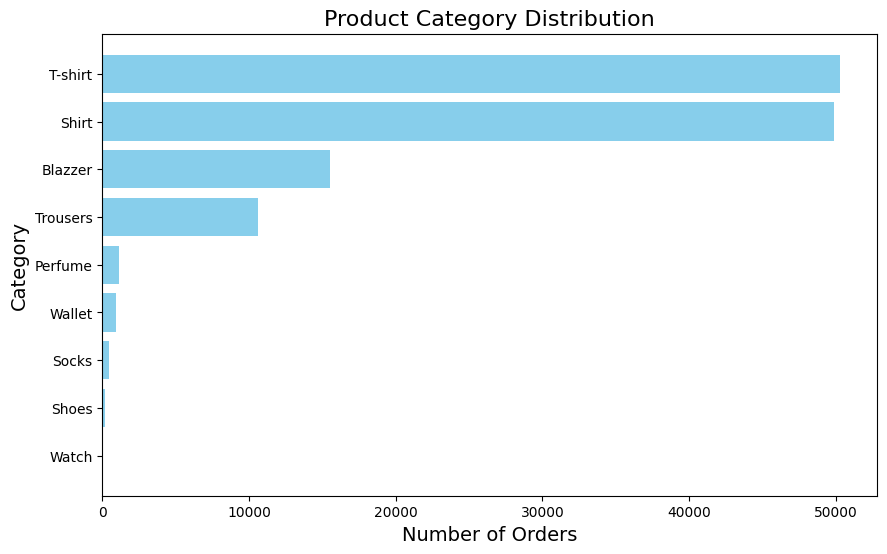

In [ ]:
# Plot the distribution of product categories
plt.figure(figsize=(10, 6))
plt.barh(category_distribution_df['Category'], category_distribution_df['Number of Orders'], color='skyblue')
plt.title('Product Category Distribution', fontsize=16)
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to show the category with the highest orders at the top
plt.show()

In [ ]:
# Count the number of orders by product size
size_distribution = df['Size'].value_counts().reset_index()

In [ ]:
# Rename the columns for clarity
size_distribution.columns = ['Size', 'Number of Orders']
display(size_distribution)

,Size,Number of Orders
0,M,22373
1,L,21807
2,XL,20549
3,XXL,17806
4,S,16776
5,3XL,14643
6,XS,11056
7,Free,2251
8,6XL,738
9,5XL,550


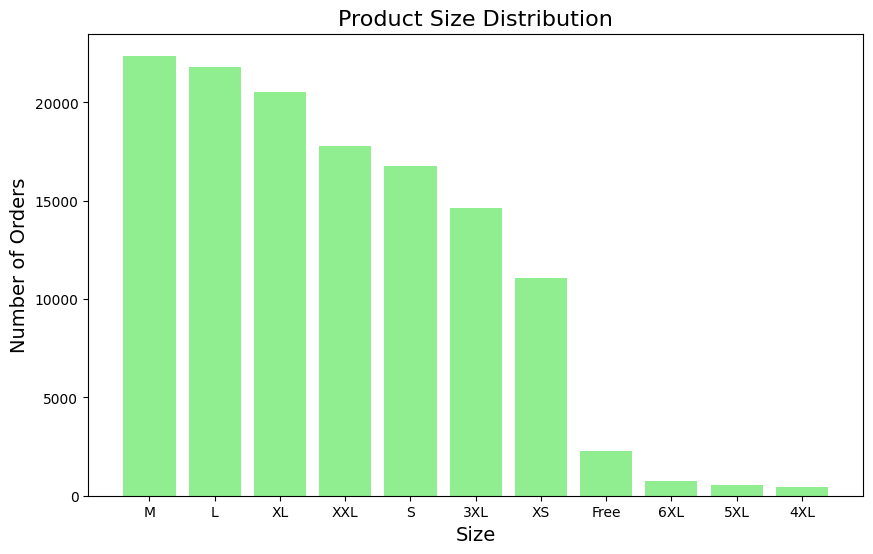

In [ ]:
# Plot the distribution of product sizes
plt.figure(figsize=(10, 6))
plt.bar(size_distribution['Size'], size_distribution['Number of Orders'], color='lightgreen')
plt.title('Product Size Distribution', fontsize=16)
plt.xlabel('Size', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.show()

In [ ]:
# Aggregate the quantity sold by category
quantity_by_category = df.groupby('Category')['Qty'].sum().reset_index()

In [ ]:
# Sort by quantity sold in descending order
quantity_by_category = quantity_by_category.sort_values(by='Qty', ascending=False)

# Display the top 5 categories by quantity sold
display(quantity_by_category)

,Category,Qty
5,T-shirt,45292
2,Shirt,45044
0,Blazzer,13943
6,Trousers,9898
1,Perfume,1051
7,Wallet,863
4,Socks,399
3,Shoes,153
8,Watch,3


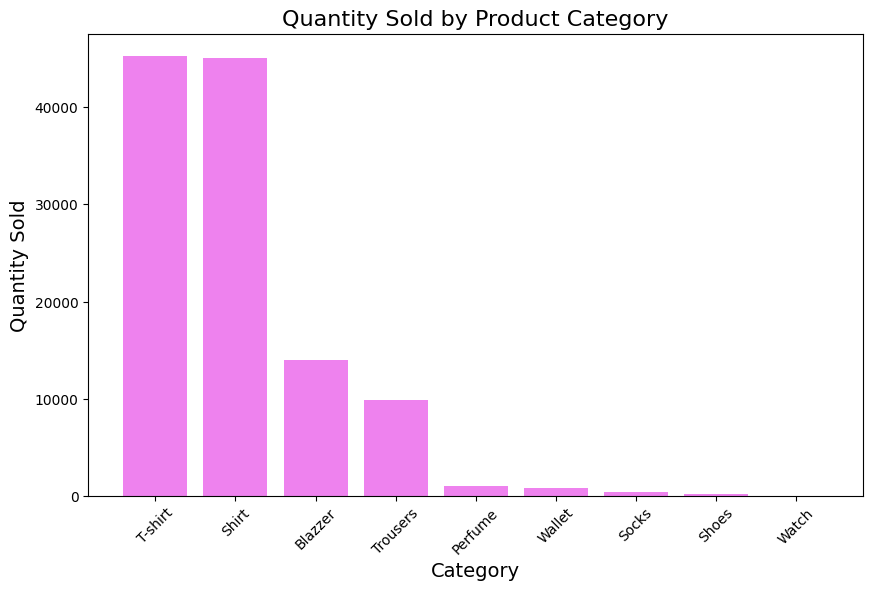

In [ ]:
# Plot the quantity sold by product category
plt.figure(figsize=(10, 6))
plt.bar(quantity_by_category['Category'], quantity_by_category['Qty'], color='violet')
plt.title('Quantity Sold by Product Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Quantity Sold', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Aggregate the quantity sold by category and size
quantity_by_category_size = df.groupby(['Category', 'Size'])['Qty'].sum().unstack().fillna(0)

# Display the first few rows of the pivot table
display(quantity_by_category_size)

Size,3XL,4XL,5XL,6XL,Free,L,M,S,XL,XS,XXL
Category,,,,,,,,,,,
Blazzer,1758.0,0.0,0.0,0.0,0.0,2545.0,2327.0,1963.0,2126.0,1279.0,1945.0
Perfume,0.0,0.0,0.0,0.0,1051.0,0.0,0.0,0.0,0.0,0.0,0.0
Shirt,5134.0,352.0,456.0,616.0,0.0,8049.0,7706.0,5161.0,7837.0,2787.0,6946.0
Shoes,0.0,0.0,0.0,0.0,153.0,0.0,0.0,0.0,0.0,0.0,0.0
Socks,60.0,0.0,0.0,0.0,0.0,68.0,50.0,67.0,64.0,26.0,64.0
T-shirt,5287.0,46.0,57.0,72.0,0.0,7396.0,8362.0,6704.0,6874.0,4890.0,5604.0
Trousers,1121.0,0.0,0.0,0.0,0.0,1648.0,1693.0,1146.0,1735.0,868.0,1687.0
Wallet,0.0,0.0,0.0,0.0,863.0,0.0,0.0,0.0,0.0,0.0,0.0
Watch,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


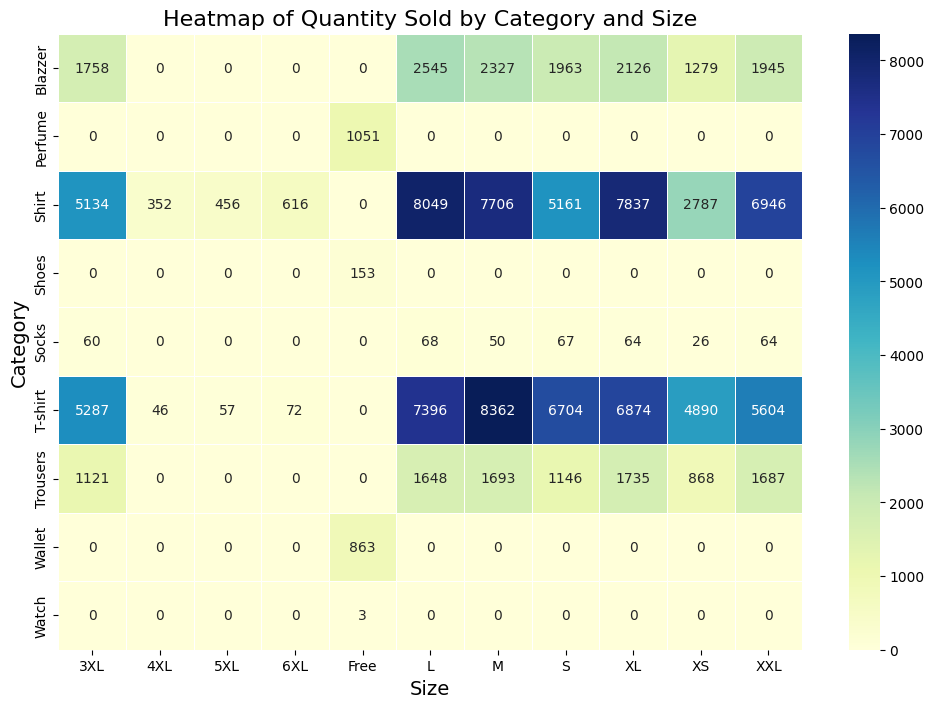

In [ ]:
# Plot the heatmap for quantity sold by category and size
plt.figure(figsize=(12, 8))
sns.heatmap(quantity_by_category_size, annot=True, fmt="g", cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap of Quantity Sold by Category and Size', fontsize=16)
plt.xlabel('Size', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same 

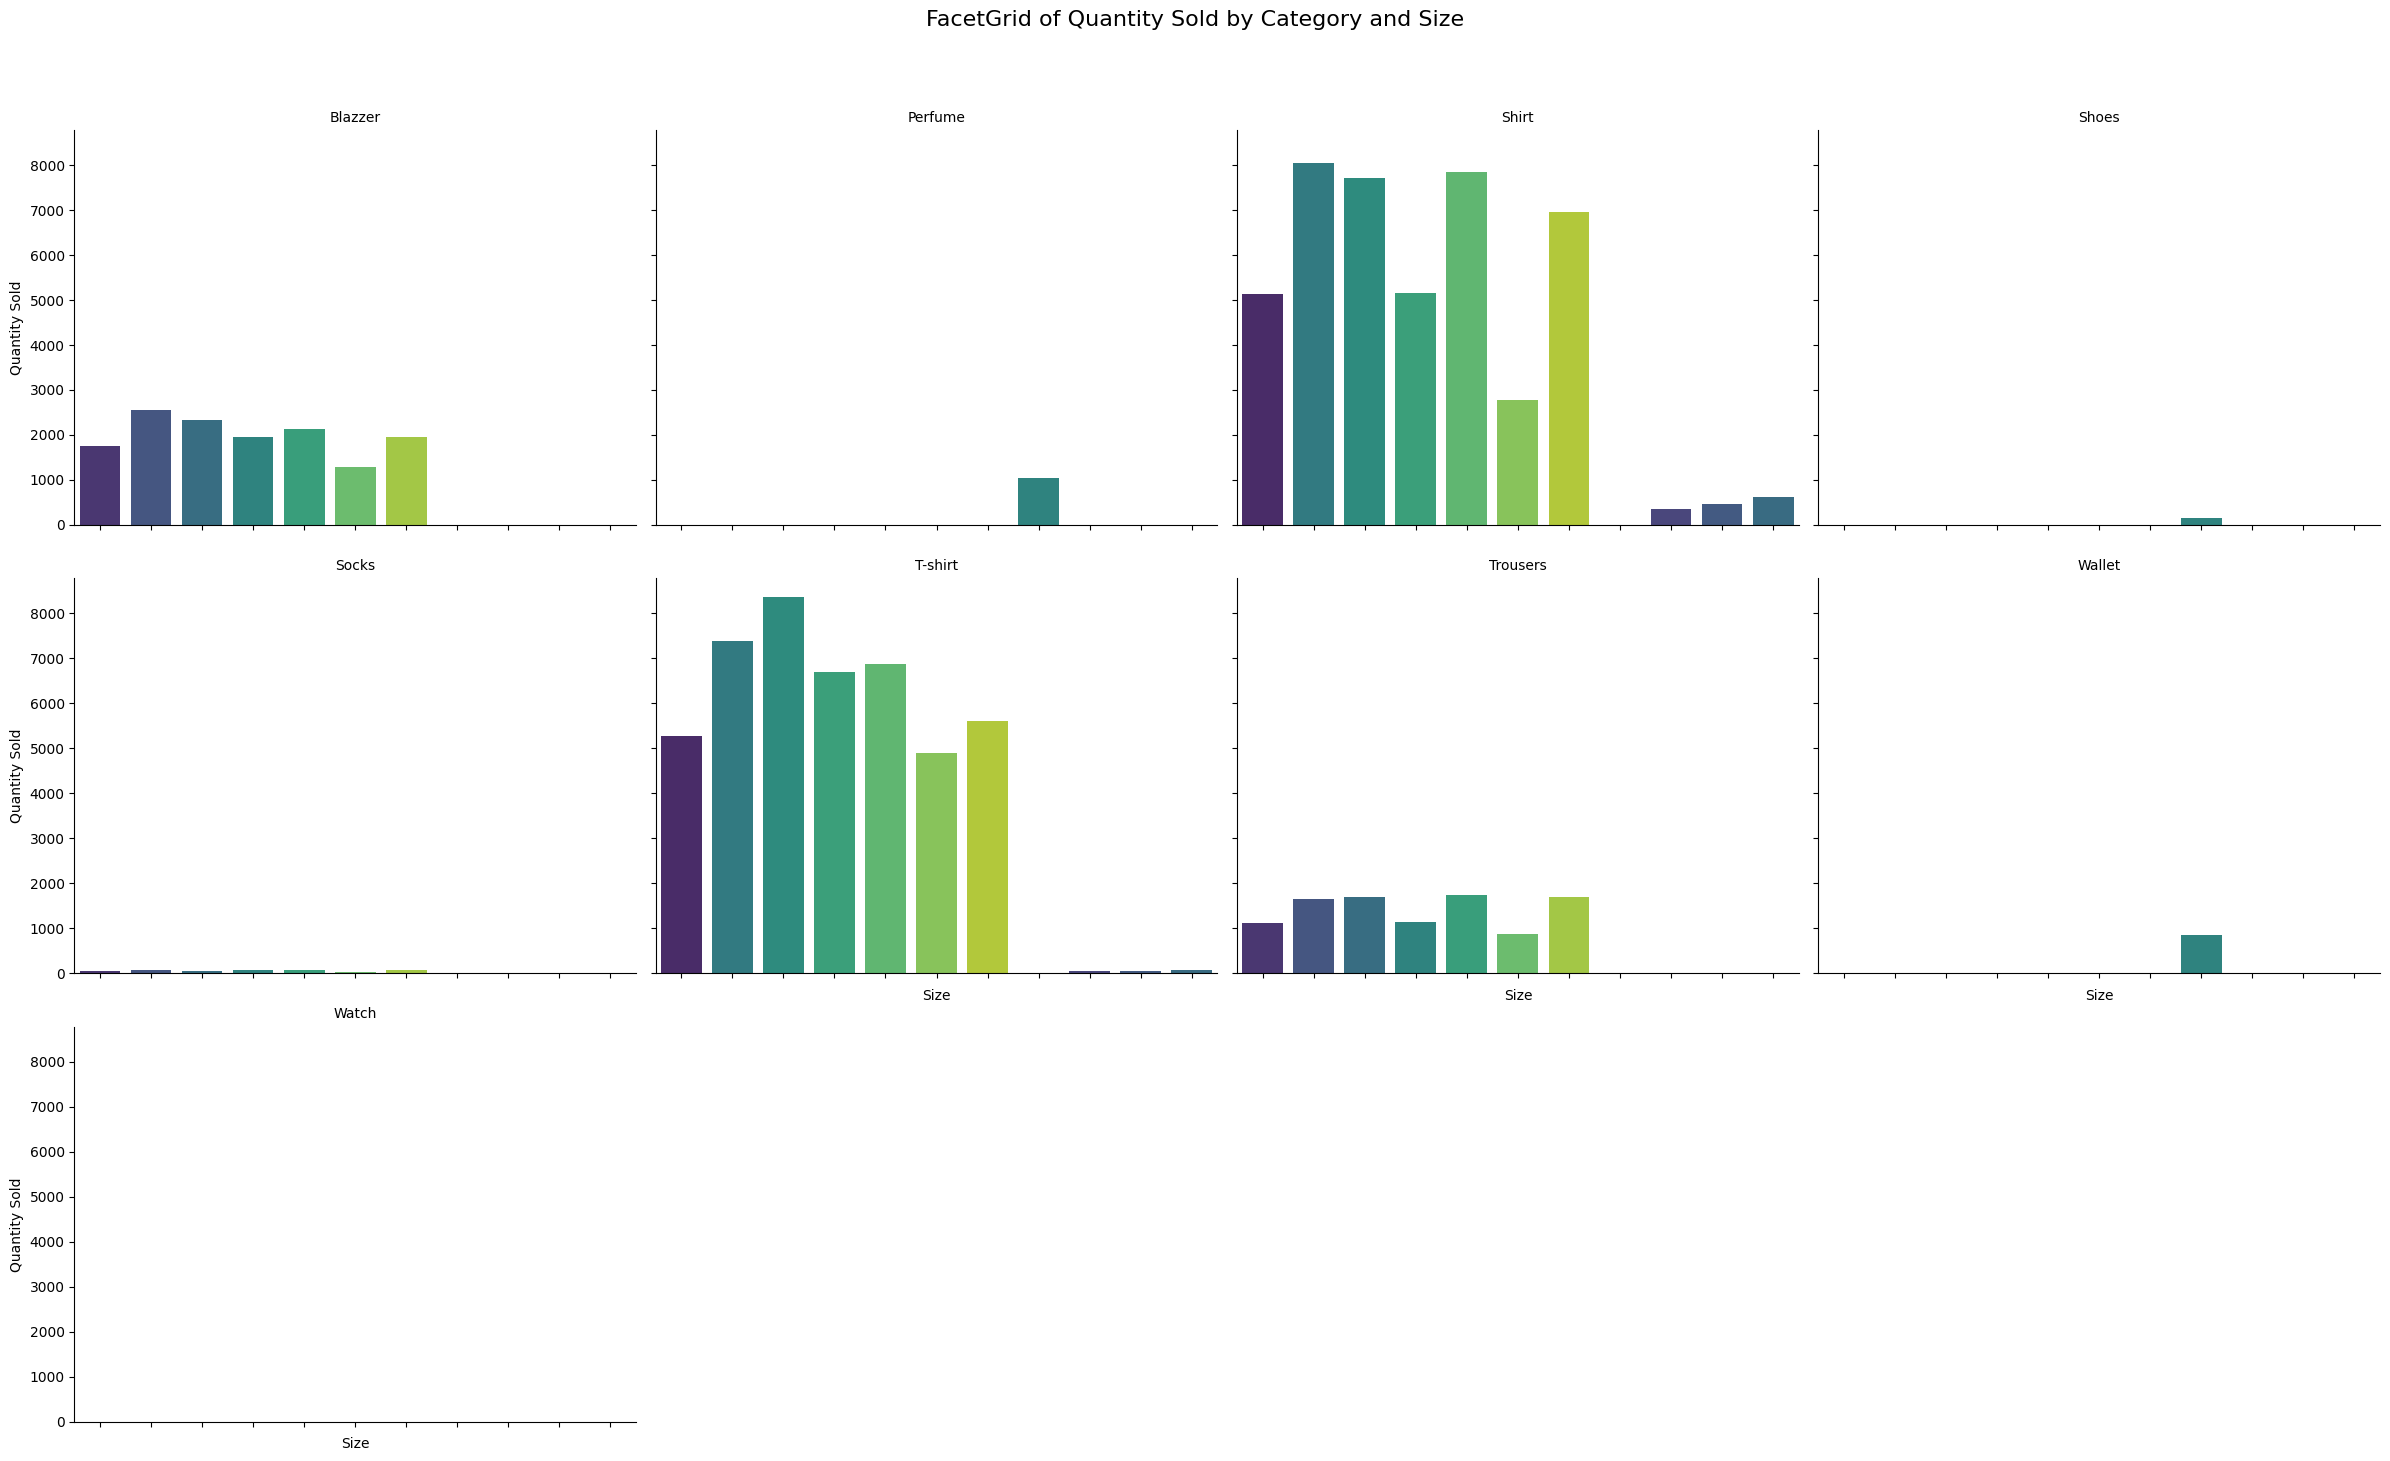

In [ ]:
# Convert the data into a format suitable for FacetGrid
quantity_by_category_size = df.groupby(['Category', 'Size'])['Qty'].sum().reset_index()

# Create a FacetGrid
g = sns.FacetGrid(quantity_by_category_size, col='Category', col_wrap=4, height=5, aspect=1.2)
g.map(sns.barplot, 'Size', 'Qty', palette='viridis')

# Adjust the titles and labels
g.set_titles("{col_name}")
g.set_axis_labels('Size', 'Quantity Sold')
g.set_xticklabels(rotation=45)
g.fig.suptitle('FacetGrid of Quantity Sold by Category and Size', fontsize=16)
g.fig.subplots_adjust(top=0.9)  # Adjust the top space to fit the title
plt.show()

 **Fulfillment Analysis**

In [ ]:
# Count the number of orders by fulfillment method
fulfillment_distribution = df['Fulfilment'].value_counts().reset_index()

# Rename the columns for clarity
fulfillment_distribution.columns = ['Fulfilment Method', 'Number of Orders']

# Display the distribution of fulfillment methods
display(fulfillment_distribution)

,Fulfilment Method,Number of Orders
0,Amazon,22989
1,Merchant,12427


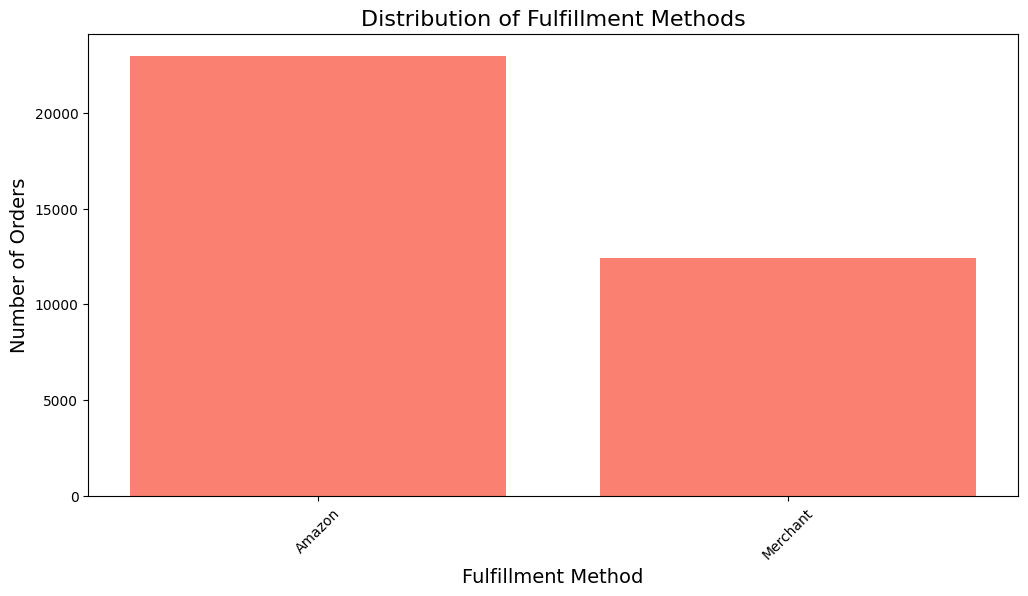

In [ ]:
# Plot the distribution of fulfillment methods
plt.figure(figsize=(12, 6))
plt.bar(fulfillment_distribution['Fulfilment Method'], fulfillment_distribution['Number of Orders'], color='salmon')
plt.title('Distribution of Fulfillment Methods', fontsize=16)
plt.xlabel('Fulfillment Method', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Create a pivot table to analyze fulfillment effectiveness
effectiveness_analysis = df.pivot_table(index='Fulfilment', columns='Status', values='Order ID', aggfunc='count', fill_value=0)

# Display the pivot table
display(effectiveness_analysis)

Status,Cancelled,Pending,Pending - Waiting for Pick Up,Shipped,Shipped - Damaged,Shipped - Delivered to Buyer,Shipped - Lost in Transit,Shipped - Out for Delivery,Shipped - Picked Up,Shipped - Rejected by Buyer,Shipped - Returned to Seller,Shipped - Returning to Seller,Shipping
Fulfilment,,,,,,,,,,,,,
Amazon,11475,415,0,77815,0,0,0,0,0,0,0,0,8
Merchant,6859,243,281,0,1,28756,5,35,973,11,1954,145,0


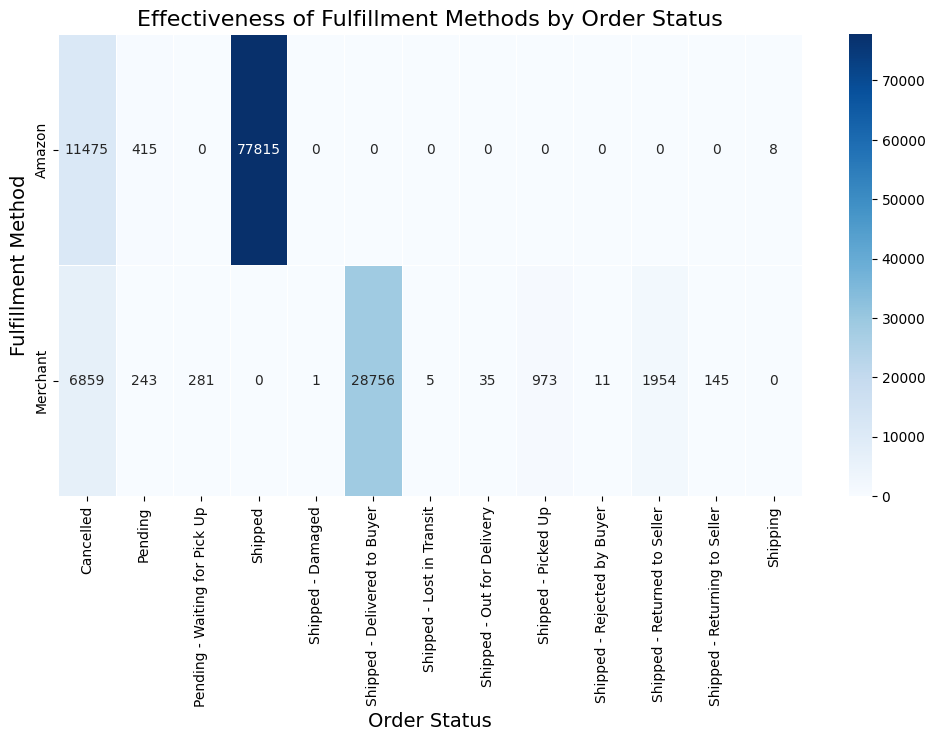

In [ ]:
# Plot the effectiveness of fulfillment methods
plt.figure(figsize=(12, 6))
sns.heatmap(effectiveness_analysis, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Effectiveness of Fulfillment Methods by Order Status', fontsize=16)
plt.xlabel('Order Status', fontsize=14)
plt.ylabel('Fulfillment Method', fontsize=14)
plt.show()

In [ ]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check if 'Delivery Date' or an equivalent column exists
if 'Delivery Date' in df.columns:
    df['Delivery Date'] = pd.to_datetime(df['Delivery Date'])
    df['Delivery Time'] = (df['Delivery Date'] - df['Date']).dt.days

    # Calculate average delivery time by fulfillment method
    average_delivery_time = df.groupby('Fulfilment')['Delivery Time'].mean().reset_index()

    # Display the average delivery time
    print(average_delivery_time)
else:
    # If 'Delivery Date' does not exist, analyze other aspects
    fulfillment_distribution = df['Fulfilment'].value_counts().reset_index()
    fulfillment_distribution.columns = ['Fulfilment Method', 'Number of Orders']

    # Display the distribution of fulfillment methods
    display(fulfillment_distribution)

,Fulfilment Method,Number of Orders
0,Amazon,89713
1,Merchant,39263


<ipython-input-163-316a8cf39890>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fulfilment', y='Amount', data=df, palette='Set2')


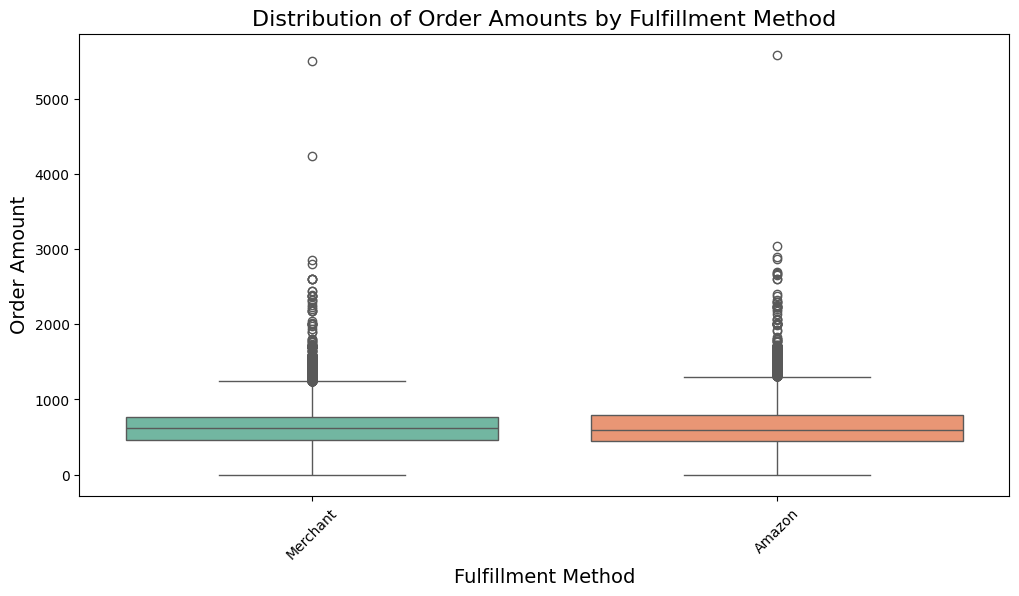

In [ ]:
# Plot the distribution of fulfillment methods
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fulfilment', y='Amount', data=df, palette='Set2')
plt.title('Distribution of Order Amounts by Fulfillment Method', fontsize=16)
plt.xlabel('Fulfillment Method', fontsize=14)
plt.ylabel('Order Amount', fontsize=14)
plt.xticks(rotation=45)
plt.show()

**Customer Segmentation**

In [ ]:
# Convert necessary columns to datetime
df['Date'] = pd.to_datetime(df['Date'])
# Feature engineering
# Check if 'customer_id' exists, if not, handle accordingly (e.g., create a dummy customer ID)
if 'customer_id' not in df.columns:
    df['customer_id'] = 'default_customer'  # Replace with a suitable default or logic to generate customer IDs

df['Total_Spent'] = df.groupby('customer_id')['Amount'].transform('sum')
df['Order_Count'] = df.groupby('customer_id')['Order ID'].transform('count')
# Example location-based feature: Create a 'Region' based on 'ship-state'
df['Region'] = df['ship-state'].apply(lambda x: 'Region_A' if x in ['State1', 'State2'] else 'Region_B')


In [ ]:
# Prepare data for clustering
features = df[['Total_Spent', 'Order_Count']]
# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
# Apply K-Means clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [ ]:
# Analyze the segments
cluster_summary = df.groupby('Cluster').agg({
    'Total_Spent': 'mean',
    'Order_Count': 'mean'
}).reset_index()

display(cluster_summary)

region_cluster_summary = df.groupby(['Region', 'Cluster']).agg({
    'Total_Spent': 'mean',
    'Order_Count': 'mean'
}).reset_index()

display(region_cluster_summary)

,Cluster,Total_Spent,Order_Count
0,0,20760193.08,35417.0


,Region,Cluster,Total_Spent,Order_Count
0,Region_B,0,20760193.08,35417.0


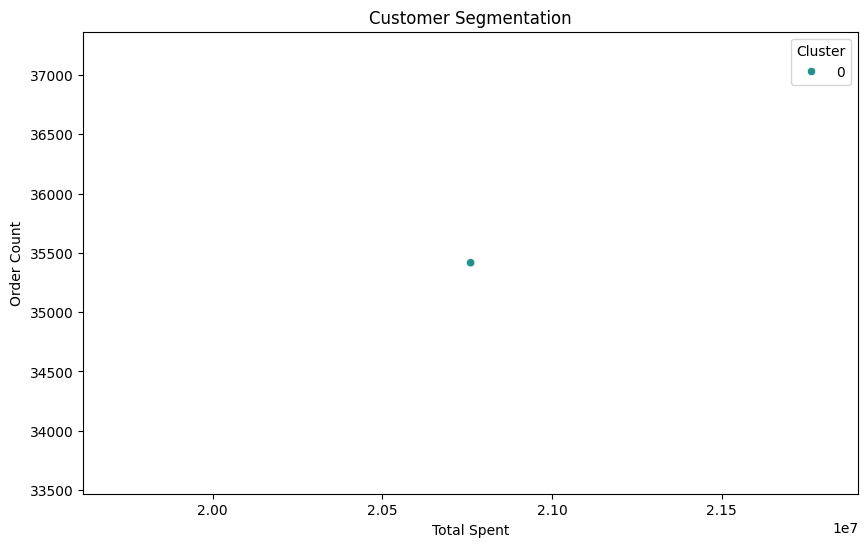

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Spent', y='Order_Count', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Total Spent')
plt.ylabel('Order Count')
plt.legend(title='Cluster')
plt.show()

**Geographical Analysis**

In [ ]:
# Convert 'Amount' to numeric if it's not already
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

In [ ]:
# Aggregate sales by state
sales_by_state = df.groupby('ship-state')['Amount'].sum().reset_index().rename(columns={'ship-state': 'state'})

# Aggregate sales by city
sales_by_city = df.groupby('ship-city')['Amount'].sum().reset_index().rename(columns={'ship-city': 'city'})

In [ ]:
# Load geographical data for states
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Load shapefile or GeoJSON for cities if available
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<ipython-input-61-97bd5bf96bea>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  cities = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [ ]:
# Merge sales data with geographical data for states
#world = world.rename(columns={'name': 'state'})  # Ensure column names match
#world = world.merge(sales_by_state, on='state', how='left')

# If you have geographical data for cities
cities = cities.rename(columns={'name': 'city'})
cities = cities.merge(sales_by_city, on='city', how='left')

<Figure size 1200x600 with 0 Axes>

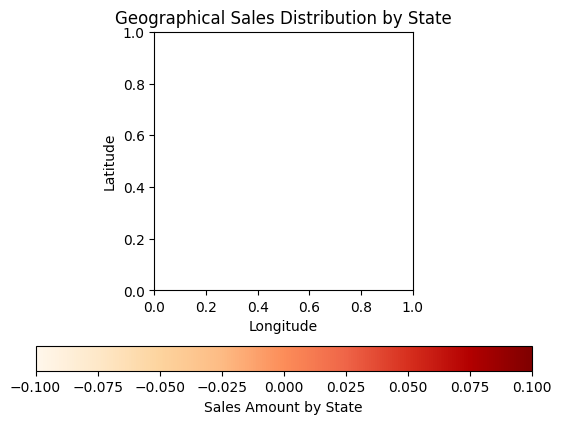

In [ ]:
# Plot geographical sales distribution by state
#plt.figure(figsize=(12, 6))
#world.plot(column='Amount', cmap='OrRd', legend=True,
#           legend_kwds={'label': "Sales Amount by State",
#                       'orientation': "horizontal"})
plt.title('Geographical Sales Distribution by State')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

<Figure size 1200x600 with 0 Axes>

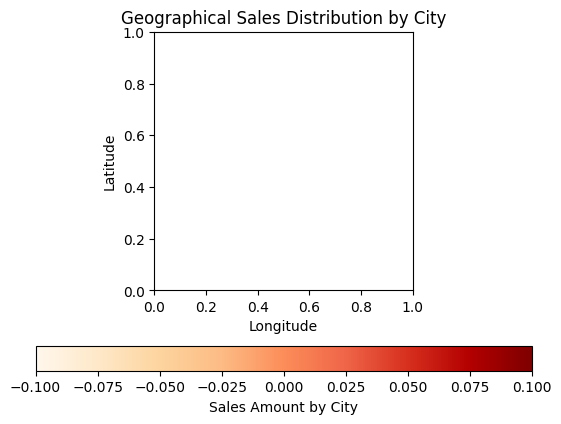

In [ ]:
# Plot geographical sales distribution by city if cities data is available
plt.figure(figsize=(12, 6))
cities.plot(column='Amount', cmap='OrRd', legend=True,
            legend_kwds={'label': "Sales Amount by City",
                         'orientation': "horizontal"})
plt.title('Geographical Sales Distribution by City')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()